<a href="https://colab.research.google.com/github/aayushi-0407/ML-Projects/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59413 sha256=0f55f44cb794f13b90f1d72fd153c22ebb3f01564d78a624f864203bac01cde1
  Stored in directory: /root/.cache/pip/wheels/35/c6/63/a3c12ecc9fdea10a593271de5c56481b427ad4049b90a176e1
Successfully built datashape


#### Importing all important modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import umap
import umap.plot

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data=pd.read_csv("/content/ecg.csv",header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


#### Calculating distribution in % to draw pie chart

In [ ]:
value=data[140].value_counts()/data[140].shape[0] #calculating in % to draw piechart

In [ ]:
value

1.0    0.584034
0.0    0.415966
Name: 140, dtype: float64

#### visualisation using pie chart

In [ ]:
fig=go.Figure(data=[go.Pie(labels=['Normal','Abnormal'],values=value)])

In [ ]:
fig.show()

In [ ]:
raw_data=data.values # storing values in form of array
raw_data

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.92528624,
         0.19313742,  1.        ],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  1.1196209 ,
        -1.4362499 ,  1.        ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.90422673,
        -0.42179659,  1.        ],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.0083694 ,
        -1.8083338 ,  0.        ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.1504486 ,
         0.80493225,  0.        ],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -1.577823  ,
        -0.68453092,  0.        ]])

In [ ]:
labels=raw_data[:,-1] #y
data=raw_data[:,:-1] #X

#### splitting data

In [ ]:
train_data,test_data,train_label,test_label=train_test_split(data,labels,test_size=0.2,random_state=100,shuffle=True)


#### Preprocessing

In [ ]:
min_val = tf.reduce_min(train_data) #extracting min value
max_val = tf.reduce_max(train_data) #extracting max value

train_data = (train_data - min_val) / (max_val - min_val) #converting data to range of 0-1
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32) #changing data type to float32
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_label

array([1., 0., 1., ..., 0., 1., 0.])

In [ ]:
train_labels = train_label.astype(bool) #changing data type to bool (true/false)
test_labels = test_label.astype(bool)

print("the length of train :",len(train_label))
print("the length of test :",len(test_label))

normal_train_data = train_data[train_labels] #stores data which label is 1
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels] #stores data with label 0
anomalous_test_data = test_data[~test_labels]

the length of train : 3998
the length of test : 1000


#### Visualising Normal ECG and Anamolous ECG

Text(0.5, 1.0, 'A Normal ECG')

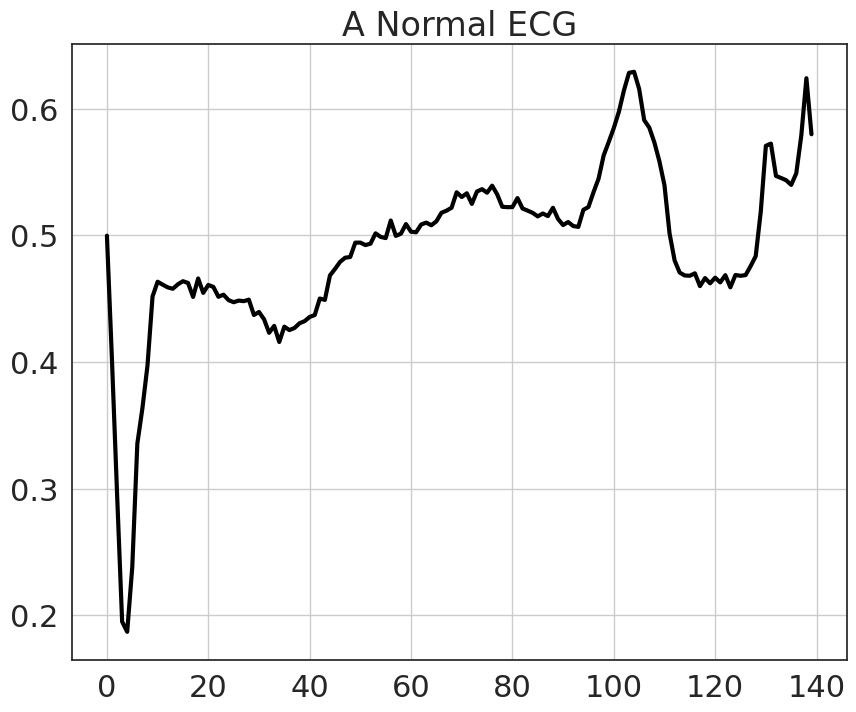

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.grid()
plt.plot(np.arange(140), normal_train_data[0],color='black',linewidth=3.0)
plt.title("A Normal ECG")

Text(0.5, 1.0, 'A anomalous ECG')

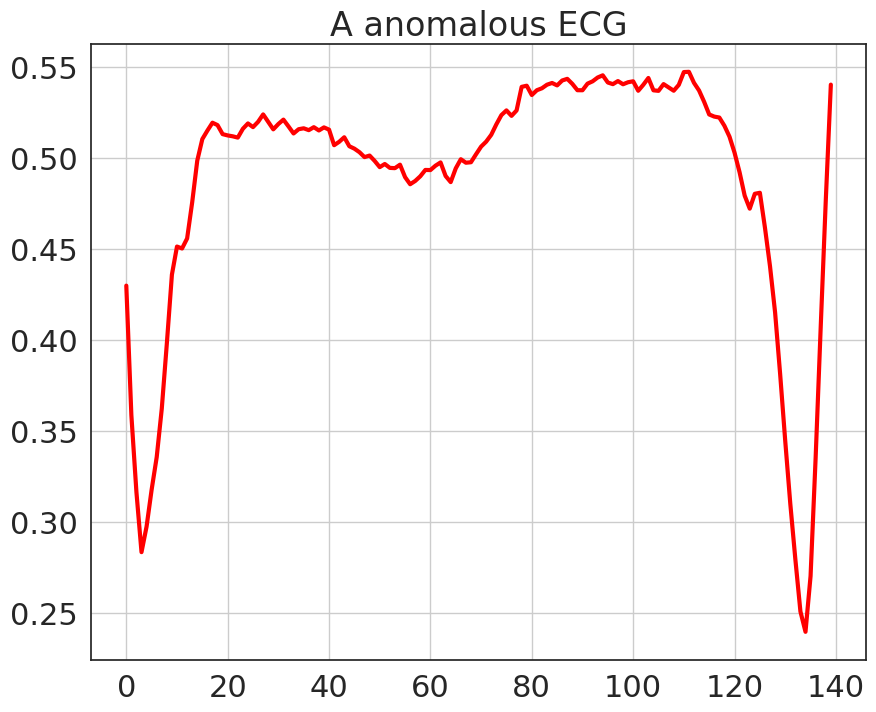

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0],color='red',linewidth=3.0)
plt.title("A anomalous ECG")

#### Defining model through class

In [ ]:
class AnamolyDetector(Model):
  def __init__(self):
    super(AnamolyDetector,self).__init__()

    self.encoder=tf.keras.Sequential([ #Encoder part of autoencoder
        layers.Dense(32,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(8,activation='relu')

    ])

    self.decoder=tf.keras.Sequential([ #decoder part of autoencoder
        layers.Dense(16,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(140,activation='sigmoid') #output size is same as input i.e 140 in this case
    ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

#### Model

In [ ]:
autoencoder=AnamolyDetector() #Model

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

#### Training Model

In [ ]:
history=autoencoder.fit(normal_train_data,normal_train_data,epochs=25,batch_size=512, validation_data=[test_data,test_data],shuffle=True)


Epoch 1/25
5/5 [==============================] - 2s 64ms/step - loss: 0.0477 - val_loss: 0.0440
Epoch 2/25
5/5 [==============================] - 0s 17ms/step - loss: 0.0447 - val_loss: 0.0429
Epoch 3/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0430 - val_loss: 0.0417
Epoch 4/25
5/5 [==============================] - 0s 16ms/step - loss: 0.0411 - val_loss: 0.0407
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0390 - val_loss: 0.0396
Epoch 6/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0369 - val_loss: 0.0385
Epoch 7/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0348 - val_loss: 0.0377
Epoch 8/25
5/5 [==============================] - 0s 15ms/step - loss: 0.0329 - val_loss: 0.0370
Epoch 9/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0311 - val_loss: 0.0363
Epoch 10/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0295 - val_loss: 0.0357
Epoch 11/25
5/5 [============

#### Visualising Training loss and Validation Loss

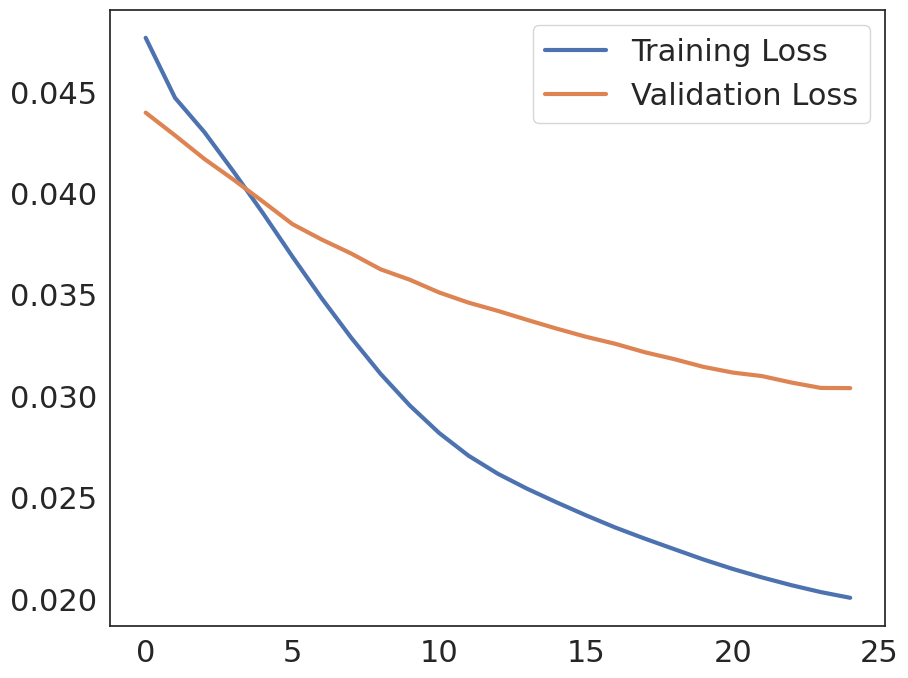

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy() #here numpy converts in array
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

#### Visualising input reconstruction and error for training data

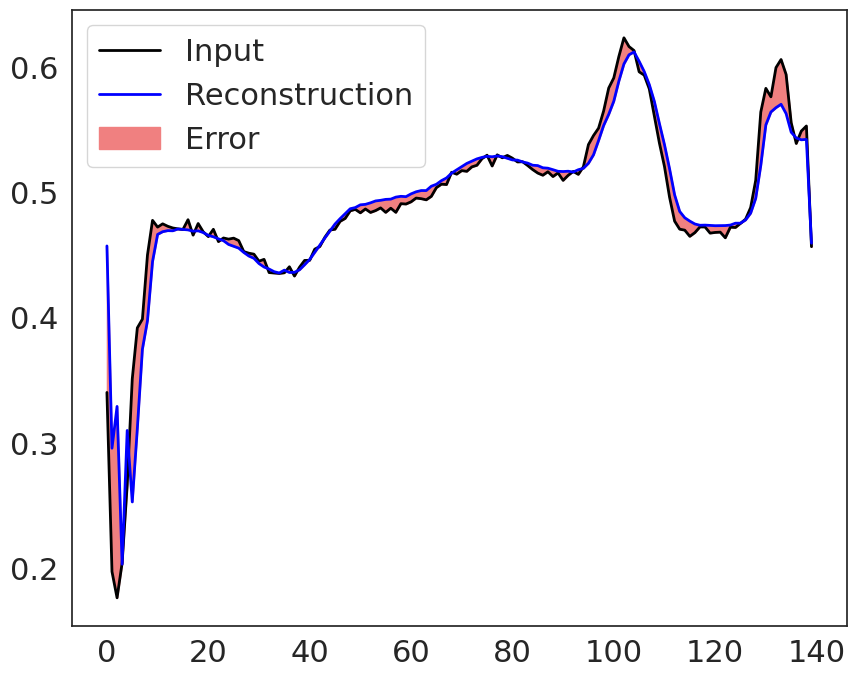

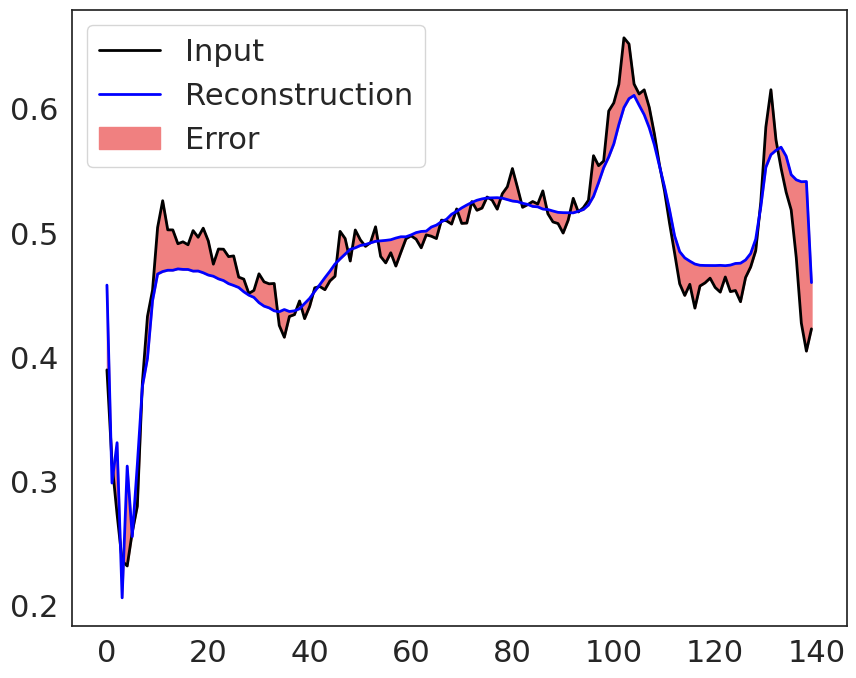

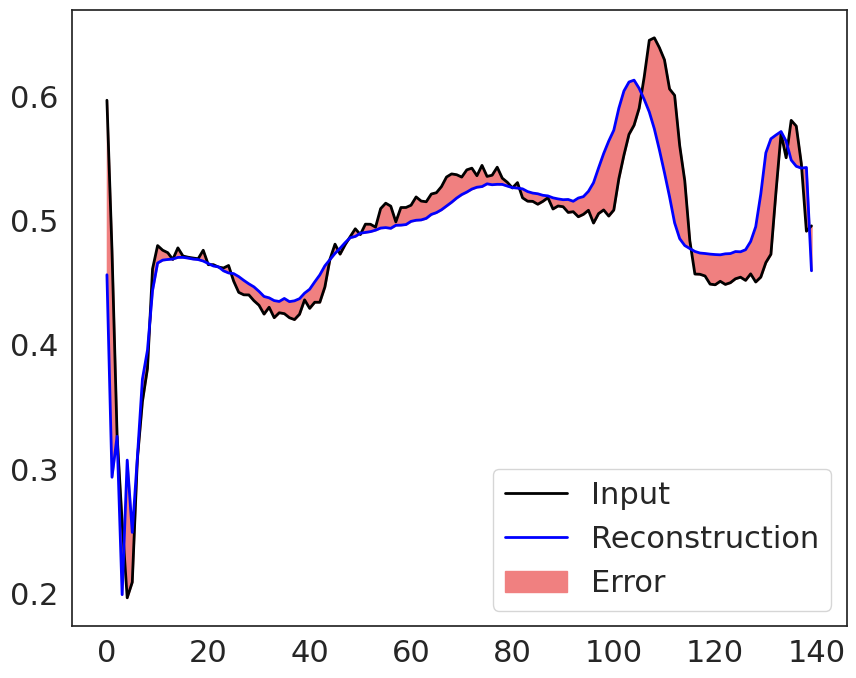

In [ ]:
for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(normal_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'blue',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], normal_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

In [ ]:
encoded_imgs_normal=pd.DataFrame(encoded_imgs)
encoded_imgs_normal['label']=1

#### Visualising for anamolous data

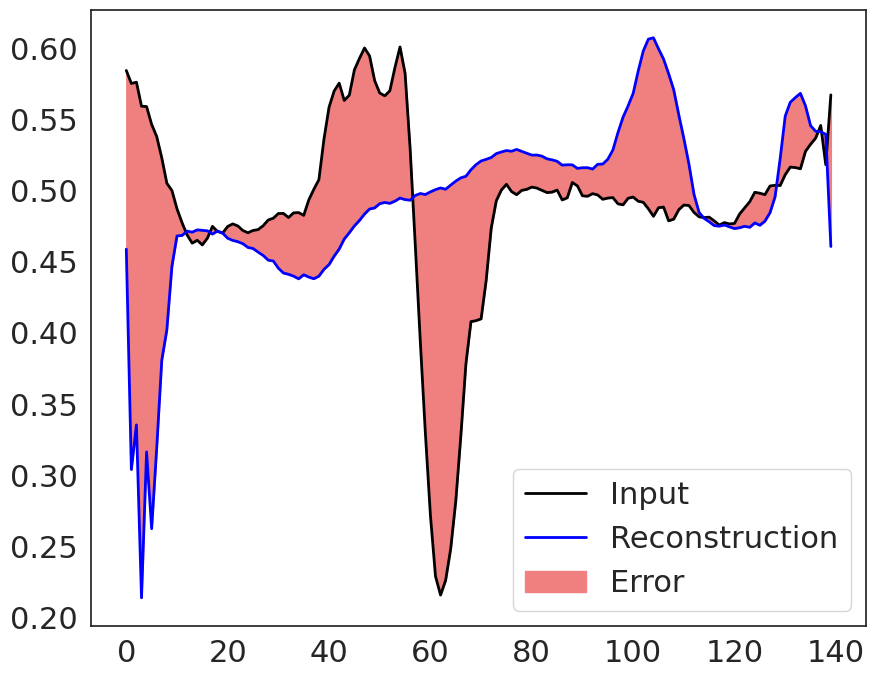

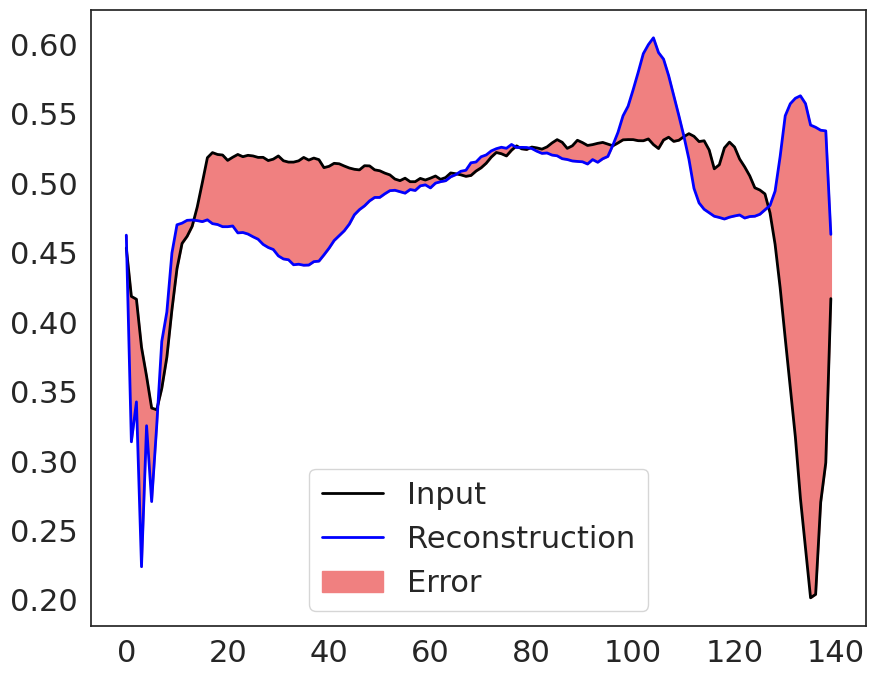

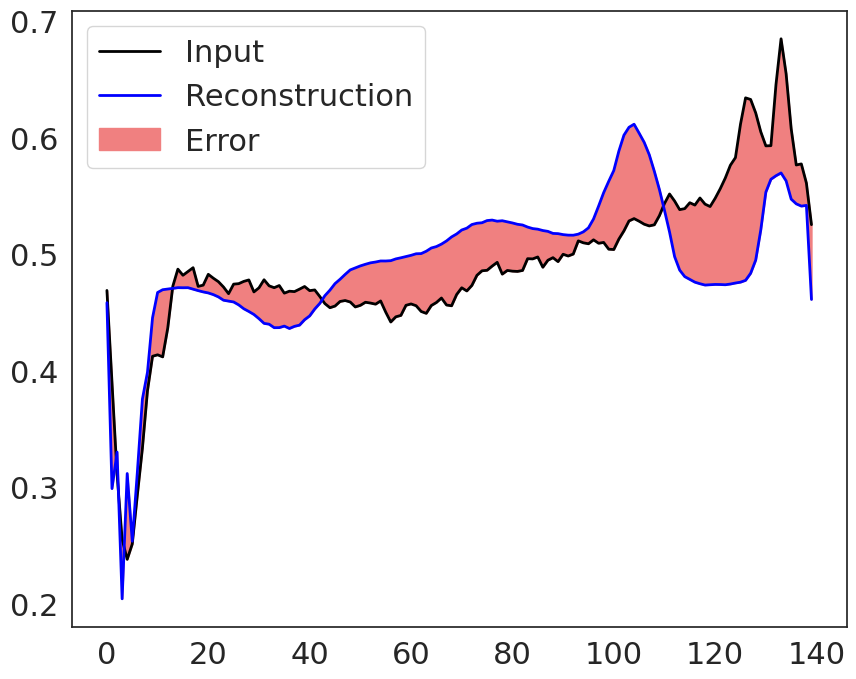

In [ ]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(anomalous_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'blue',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], anomalous_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

In [ ]:
encoded_imgs_abnormal=pd.DataFrame(encoded_imgs)
encoded_imgs_abnormal['label']=0

In [ ]:
all_encoded=pd.concat([encoded_imgs_normal,encoded_imgs_abnormal])

In [ ]:
all_encoded.tail()

,0,1,2,3,4,5,6,7,label
392,1.128616,0.0,0.838836,0.0,0.867274,0.546256,0.0,0.0,0
393,1.118711,0.0,0.843516,0.0,0.872168,0.540210,0.0,0.0,0
394,1.080898,0.0,0.810075,0.0,0.857064,0.501633,0.0,0.0,0
395,1.120610,0.0,0.817817,0.0,0.845073,0.528031,0.0,0.0,0
396,1.106147,0.0,0.826731,0.0,0.869429,0.526442,0.0,0.0,0


<Axes: >

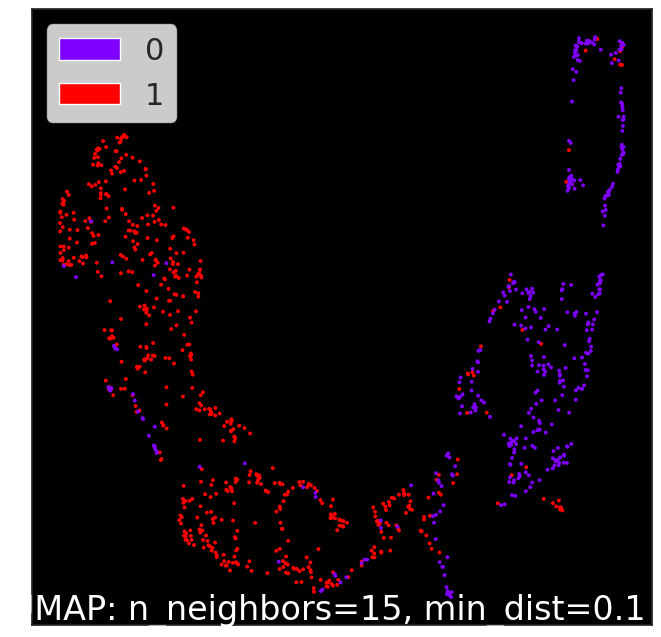

In [ ]:
mapper = umap.UMAP().fit(all_encoded.iloc[:,:8])
umap.plot.points(mapper, labels=all_encoded.iloc[:,8], theme='fire')

#### Now we are going to calculate reconstruction error

In [ ]:
reconstructions=autoencoder.predict(normal_train_data)

73/73 [==============================] - 0s 3ms/step


In [ ]:
train_loss=tf.keras.losses.mae(reconstructions,normal_train_data)

In [ ]:
train_loss

<tf.Tensor: shape=(2316,), dtype=float32, numpy=
array([0.01129004, 0.02450348, 0.06857731, ..., 0.05220818, 0.01308681,
       0.01822435], dtype=float32)>

In [ ]:
np.mean(train_loss)

0.019912697

#### Visualising reconstruction loss over Normal Data

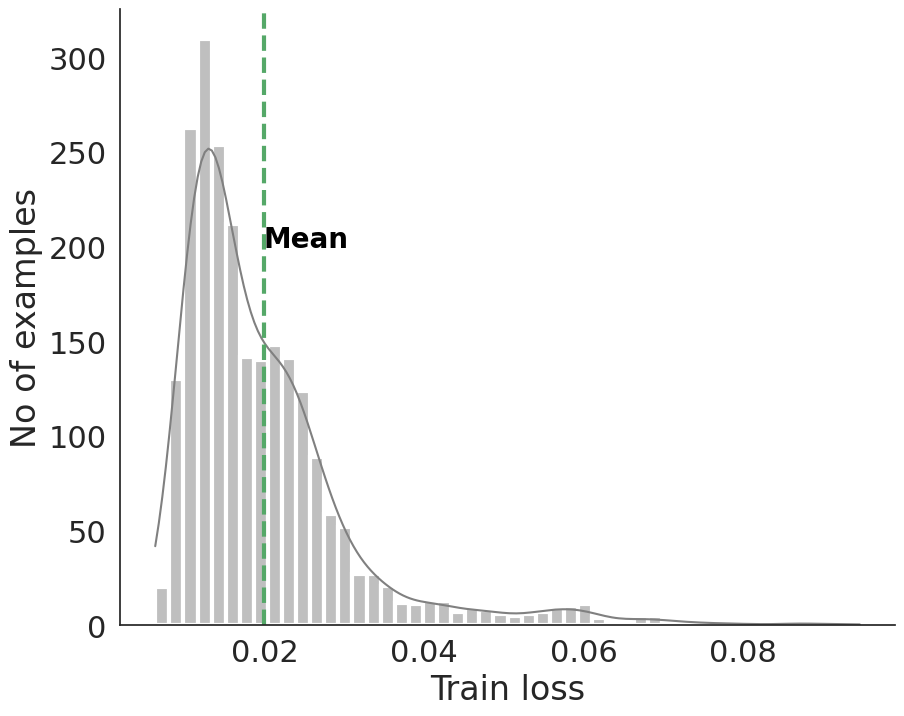

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Mean", horizontalalignment='left',
         size='small', color='black', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

#### Calculating threshold

In [ ]:
threshold=np.mean(train_loss)+np.std(train_loss) #mean+ standard deviation
threshold

0.03119364

#### Visualising threshold alongwith mean

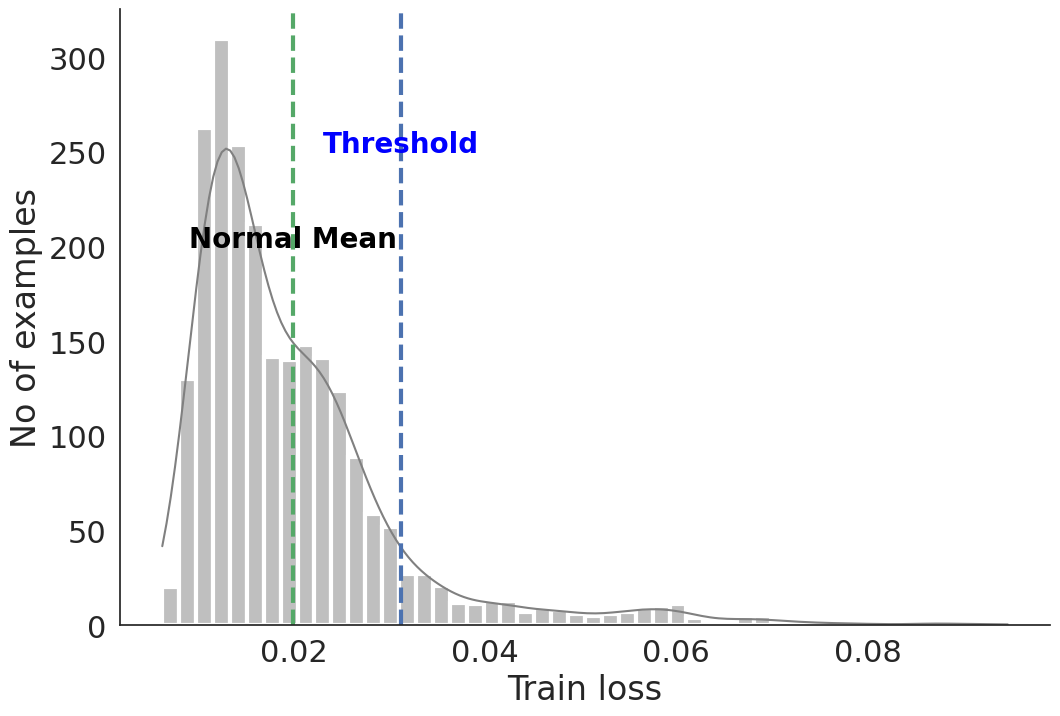

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

#### calculating reconstruction loss over Anamolous Data

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

13/13 [==============================] - 0s 3ms/step


#### Plotting for Anamolous data

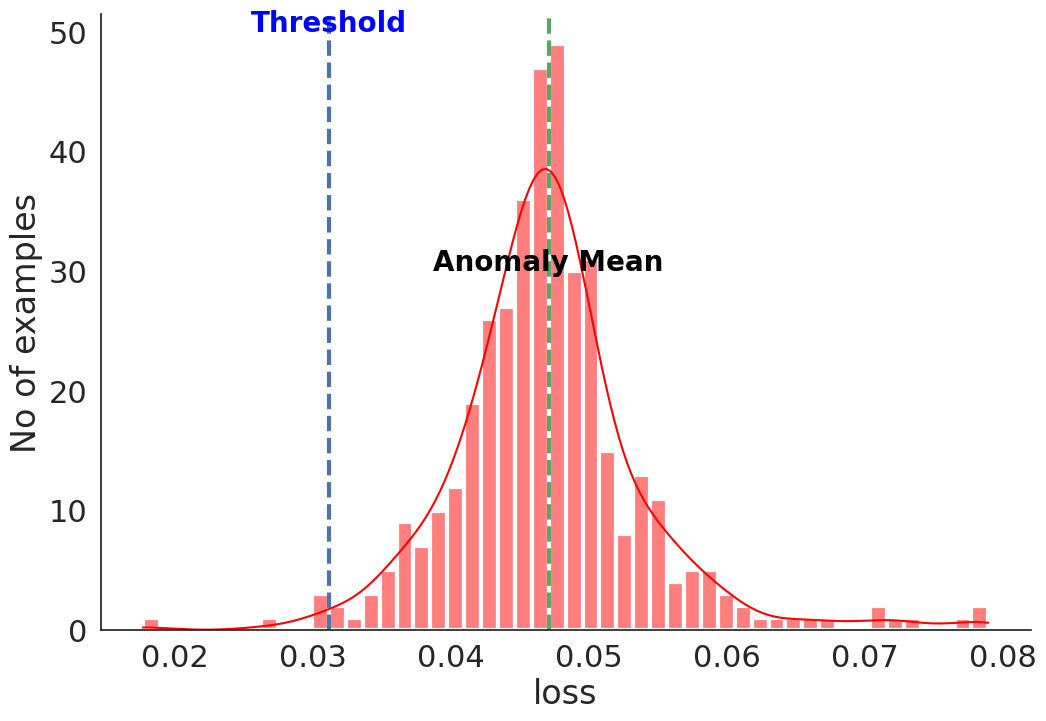

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 30, "Anomaly Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.text(threshold, 50, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

#### Now we wish to visualise Normal data mean , threshold and anamolous data mean all together

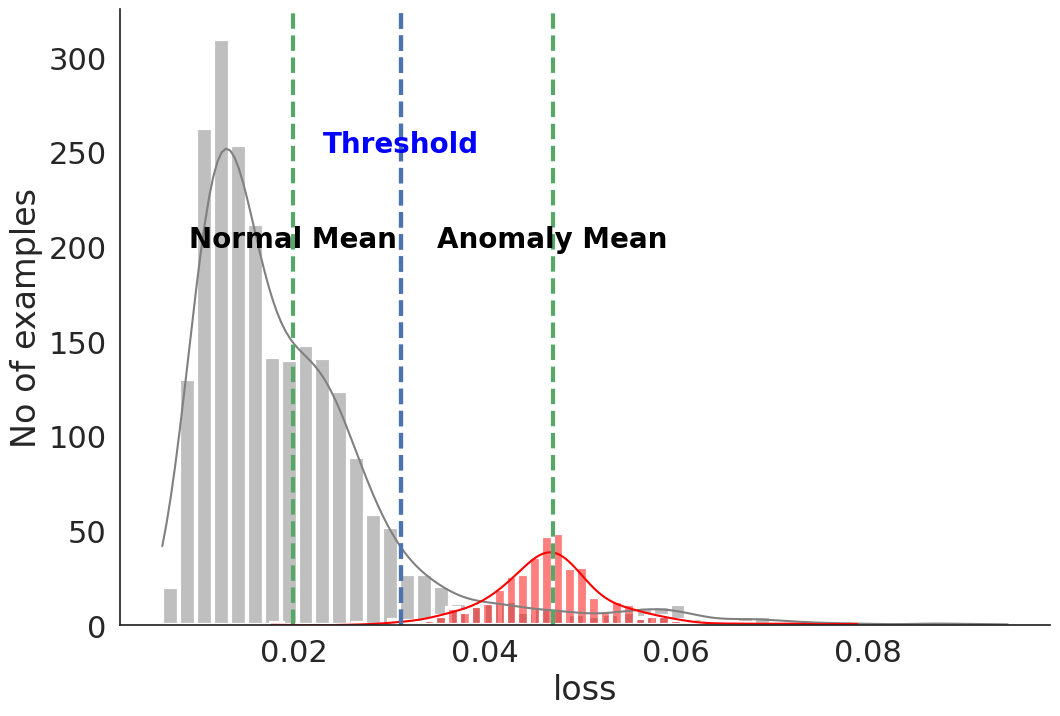

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')

sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

#### Function to calculate loss

In [ ]:
def predict(model, data,threshold):
  reconstruction=model(data)
  loss=tf.keras.losses.mae(reconstruction,data)
  return tf.math.less(loss,threshold)

#### Function to print accuracy , precision and recall

In [ ]:
def print_stats(preds, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [ ]:
preds=predict(autoencoder,test_data,threshold)
print_stats(preds,test_labels)

Accuracy = 0.942
Precision = 0.990990990990991
Recall = 0.912106135986733


In [ ]:
print(classification_report(preds,test_labels))


              precision    recall  f1-score   support

       False       0.99      0.88      0.93       445
        True       0.91      0.99      0.95       555

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000



In [ ]:
confusion_matrix(preds,test_labels)

array([[392,  53],
       [  5, 550]])